# EDA- Stock Market Data
### YIYUN (Rona) LUO


In [2]:
library(quantmod)
library(TTR)
library(tidyverse) 
library(dplyr)

Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Loading required package: TTR
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Version 0.4-0 included new data defaults. See ?getSymbols.
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dpl

In [7]:
getSymbols("NVDA")

[1] "NVDA"

In [11]:
head(NVDA)

           NVDA.Open NVDA.High NVDA.Low NVDA.Close NVDA.Volume NVDA.Adjusted
2007-01-03  24.71333  25.01333 23.19333   24.05333    28870500      22.16778
2007-01-04  23.96667  24.05333 23.35333   23.94000    19932400      22.06333
2007-01-05  23.37333  23.46667 22.28000   22.44000    31083600      20.68091
2007-01-08  22.52000  23.04000 22.13333   22.60667    16431700      20.83451
2007-01-09  22.64000  22.79333 22.14000   22.16667    19104100      20.42901
2007-01-10  21.93333  23.46667 21.60000   23.26000    27718600      21.43663

In [12]:
tail(NVDA)

           NVDA.Open NVDA.High NVDA.Low NVDA.Close NVDA.Volume NVDA.Adjusted
2019-09-06    178.80    181.09   177.12     178.65     9424400        178.65
2019-09-09    179.90    183.98   179.84     180.50    10438100        180.50
2019-09-10    179.18    184.25   178.79     183.18     8820300        183.18
2019-09-11    183.77    186.27   182.60     184.33     9037800        184.33
2019-09-12    186.20    188.40   183.95     184.27     8196000        184.27
2019-09-13    181.59    183.08   180.18     181.94     8068900        181.94

## Compare 20-day moving average, 60-day moving average and 120-day moving average
### If the fast moving average is above the slow moving average, it could say we are in bull market, which means investors are encouraged to buy, and vice versa.

In [25]:
NVDA_SMA20 <-SMA(NVDA$NVDA.Close,n=20) 
NVDA_SMA60 <-SMA(NVDA$NVDA.Close,n=60)
NVDA_SMA120 <-SMA(NVDA$NVDA.Close,n=120)

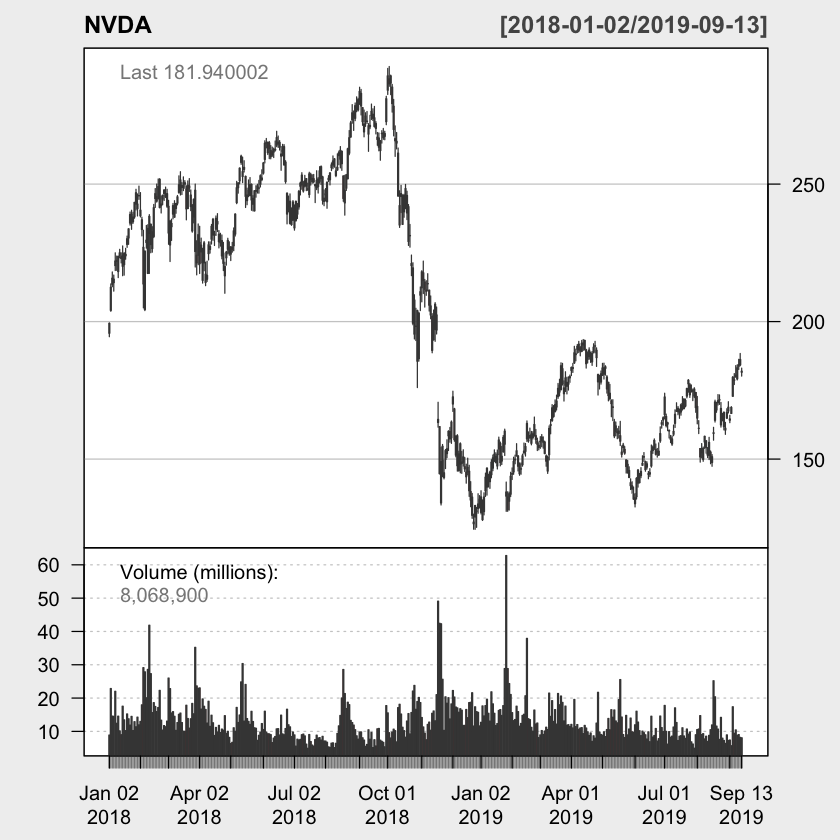

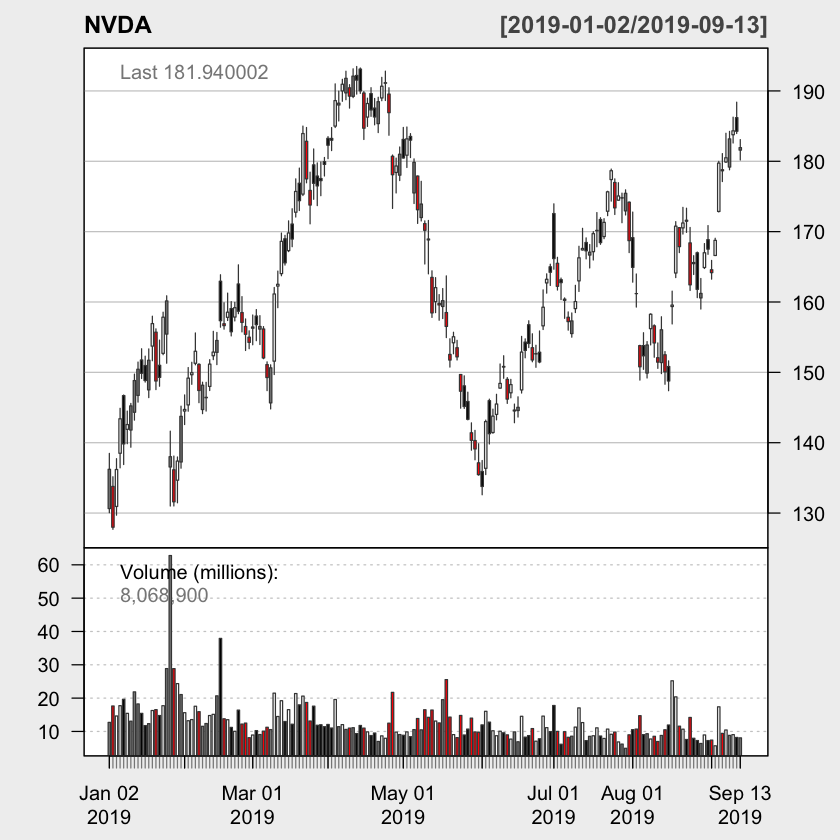

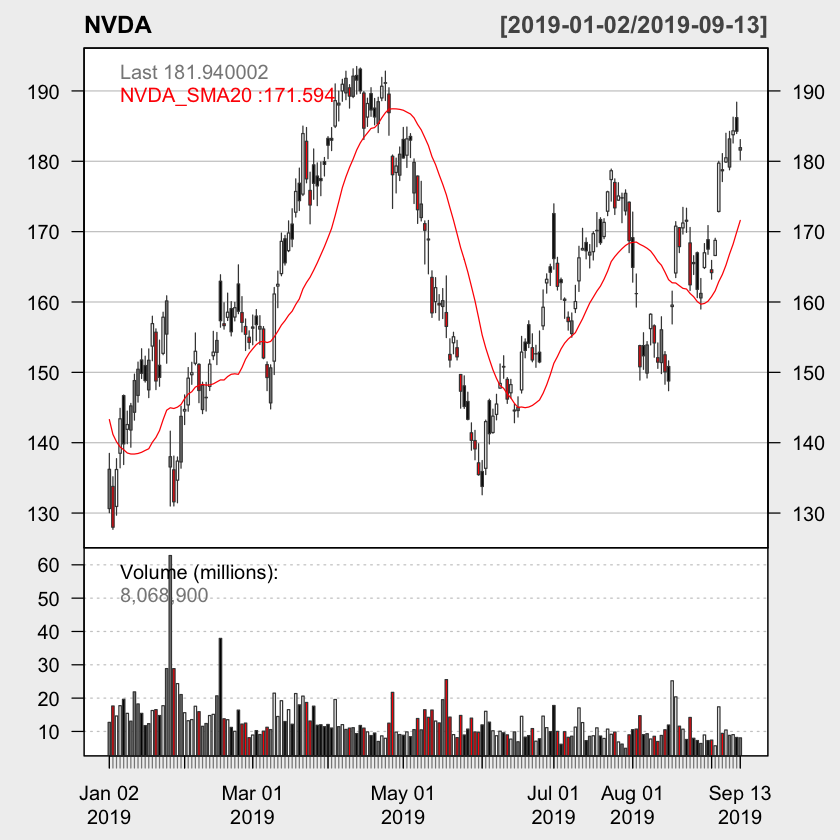

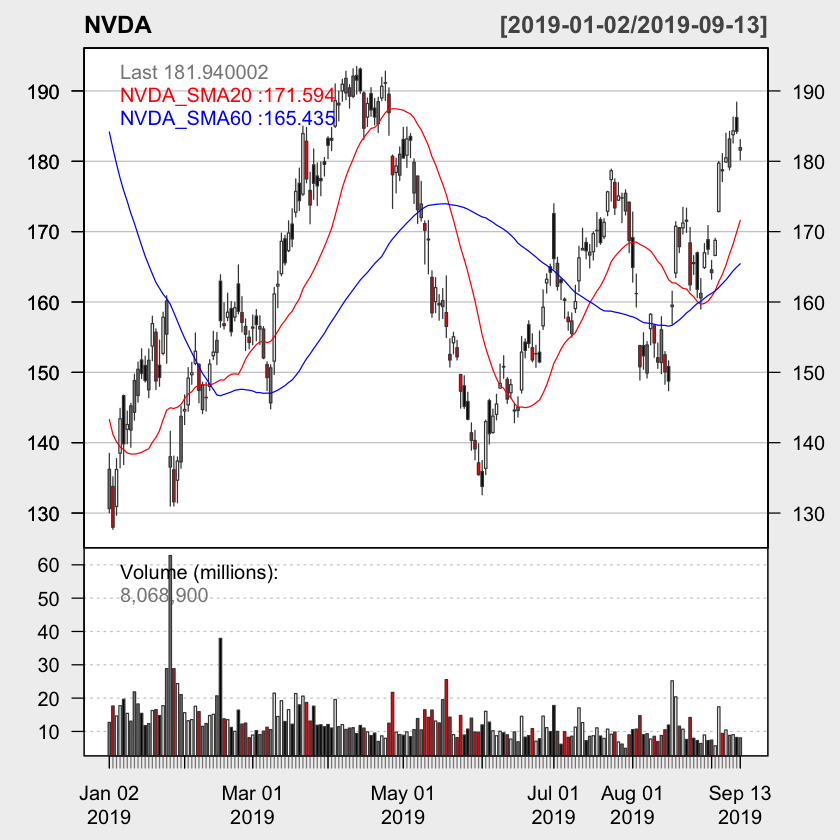

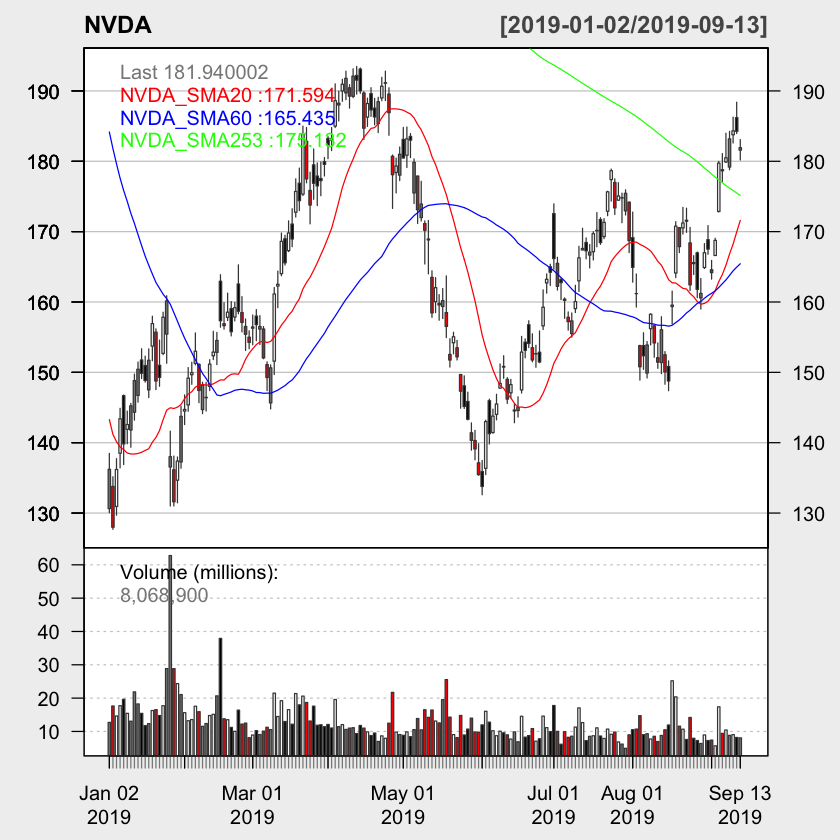

In [28]:
candleChart(NVDA,multi.col=TRUE, theme = "white", subset = "2018::2019-09")
zoomChart('2019')
addTA(NVDA_SMA20, on = 1, col = "red")  
addTA(NVDA_SMA60, on = 1, col = "blue")
addTA(NVDA_SMA253, on = 1, col = "green")

## Trade with CCI (possible buy/sell signals)
### Determine cyclical buying and selling points
* The CCI crosses above 100 and has started to curve downward
* The CCI crosses below -100 and has started to curve upward

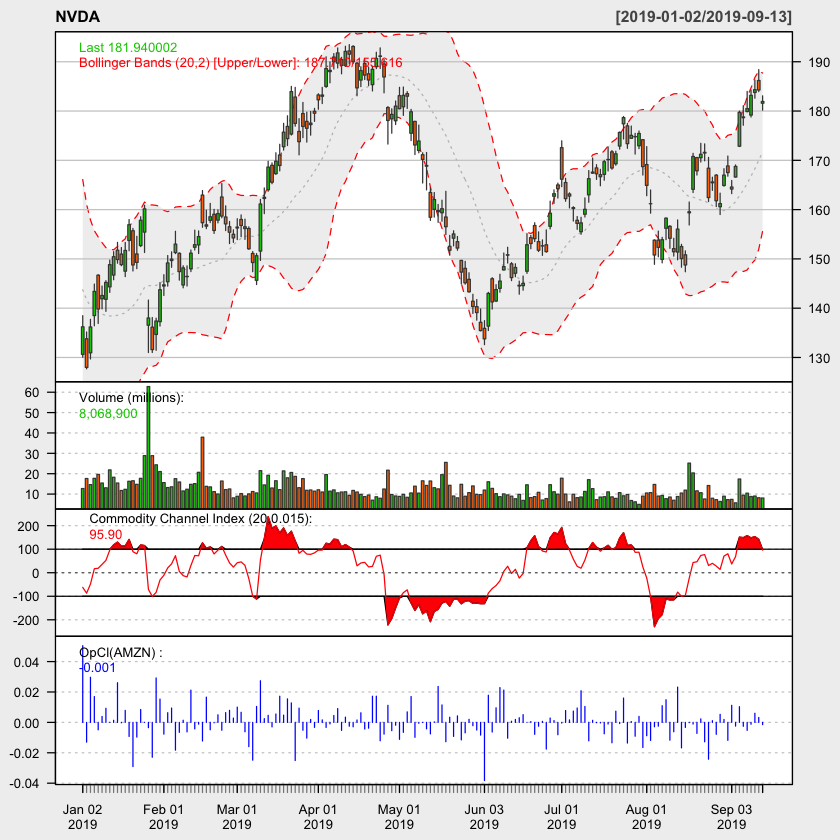

In [29]:
chartSeries(NVDA, subset = "2019::2019-09",
            theme="white",  
            TA="addVo();addBBands();addCCI(); 
                addTA(OpCl(AMZN),col='blue', type='h')  ")

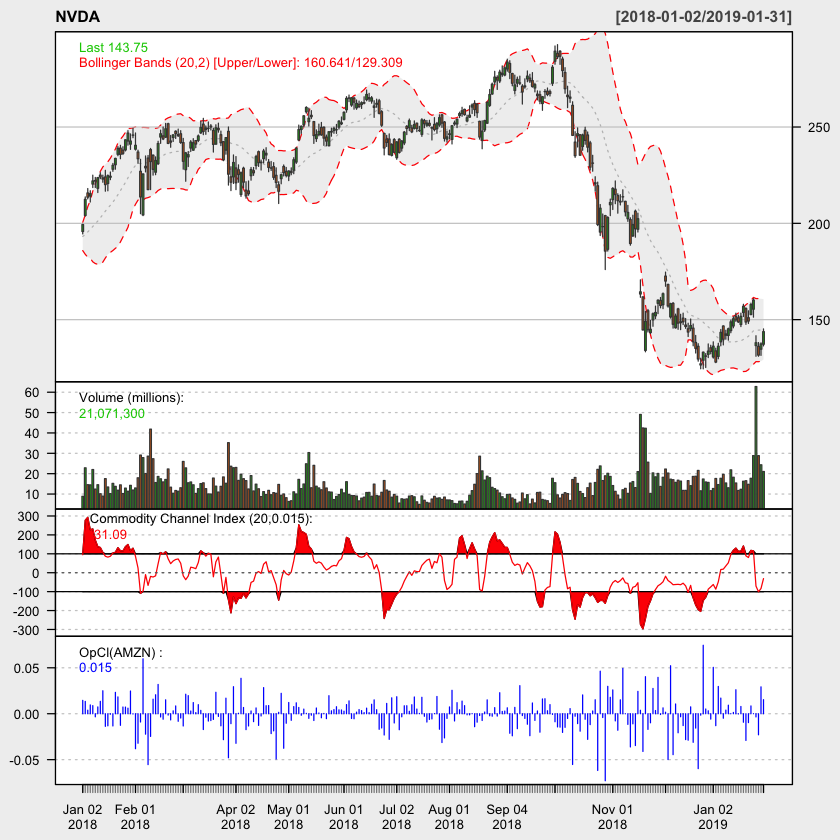

In [31]:
chartSeries(NVDA, subset = "2018::2019-01",
            theme="white",  
            TA="addVo();addBBands();addCCI(); 
                addTA(OpCl(AMZN),col='blue', type='h')  ")

## Analysis with lag

In [39]:
df <- NVDA

In [40]:
df$OpCl <- OpCl(df)
df$OpOp <- OpOp(df) 
df$HiCl <- HiCl(df) 
head(df)

           NVDA.Open NVDA.High NVDA.Low NVDA.Close NVDA.Volume NVDA.Adjusted
2007-01-03  24.71333  25.01333 23.19333   24.05333    28870500      22.16778
2007-01-04  23.96667  24.05333 23.35333   23.94000    19932400      22.06333
2007-01-05  23.37333  23.46667 22.28000   22.44000    31083600      20.68091
2007-01-08  22.52000  23.04000 22.13333   22.60667    16431700      20.83451
2007-01-09  22.64000  22.79333 22.14000   22.16667    19104100      20.42901
2007-01-10  21.93333  23.46667 21.60000   23.26000    27718600      21.43663
                   OpCl         OpOp         HiCl
2007-01-03 -0.026706232           NA -0.038379570
2007-01-04 -0.001112629 -0.030213084 -0.004711696
2007-01-05 -0.039931489 -0.024756634 -0.043749971
2007-01-08  0.003848446 -0.036508828 -0.018807898
2007-01-09 -0.020906936  0.005328552 -0.027493434
2007-01-10  0.060486387 -0.031213208 -0.008806832

In [41]:
df$lagCl <- Lag(Cl(df)) #One period lag of the close 
head(df)

           NVDA.Open NVDA.High NVDA.Low NVDA.Close NVDA.Volume NVDA.Adjusted
2007-01-03  24.71333  25.01333 23.19333   24.05333    28870500      22.16778
2007-01-04  23.96667  24.05333 23.35333   23.94000    19932400      22.06333
2007-01-05  23.37333  23.46667 22.28000   22.44000    31083600      20.68091
2007-01-08  22.52000  23.04000 22.13333   22.60667    16431700      20.83451
2007-01-09  22.64000  22.79333 22.14000   22.16667    19104100      20.42901
2007-01-10  21.93333  23.46667 21.60000   23.26000    27718600      21.43663
                   OpCl         OpOp         HiCl    lagCl
2007-01-03 -0.026706232           NA -0.038379570       NA
2007-01-04 -0.001112629 -0.030213084 -0.004711696 24.05333
2007-01-05 -0.039931489 -0.024756634 -0.043749971 23.94000
2007-01-08  0.003848446 -0.036508828 -0.018807898 22.44000
2007-01-09 -0.020906936  0.005328552 -0.027493434 22.60667
2007-01-10  0.060486387 -0.031213208 -0.008806832 22.16667

## Volume Analysis

In [43]:
df_v<-NVDA

In [44]:
df_v$month <- format(index(df_v),"%Y%m")
df_v$year <- format(index(df_v),"%Y")
head(df_v)

           NVDA.Open NVDA.High NVDA.Low NVDA.Close NVDA.Volume NVDA.Adjusted
2007-01-03  24.71333  25.01333 23.19333   24.05333    28870500      22.16778
2007-01-04  23.96667  24.05333 23.35333   23.94000    19932400      22.06333
2007-01-05  23.37333  23.46667 22.28000   22.44000    31083600      20.68091
2007-01-08  22.52000  23.04000 22.13333   22.60667    16431700      20.83451
2007-01-09  22.64000  22.79333 22.14000   22.16667    19104100      20.42901
2007-01-10  21.93333  23.46667 21.60000   23.26000    27718600      21.43663
            month year
2007-01-03 200701 2007
2007-01-04 200701 2007
2007-01-05 200701 2007
2007-01-08 200701 2007
2007-01-09 200701 2007
2007-01-10 200701 2007

In [45]:
df_v <- as.data.frame(df_v)
head(df_v)

,NVDA.Open,NVDA.High,NVDA.Low,NVDA.Close,NVDA.Volume,NVDA.Adjusted,month,year
2007-01-03,24.71333,25.01333,23.19333,24.05333,28870500,22.16778,200701,2007
2007-01-04,23.96667,24.05333,23.35333,23.94000,19932400,22.06333,200701,2007
2007-01-05,23.37333,23.46667,22.28000,22.44000,31083600,20.68091,200701,2007
2007-01-08,22.52000,23.04000,22.13333,22.60667,16431700,20.83451,200701,2007
2007-01-09,22.64000,22.79333,22.14000,22.16667,19104100,20.42901,200701,2007
2007-01-10,21.93333,23.46667,21.60000,23.26000,27718600,21.43663,200701,2007


In [68]:
NVDA_2018_19 <- df_v %>% filter(year ==2018 | year == 2019)
p_2018_19 <-ggplot(NVDA_2018_19, aes(x=as.factor(month), y=NVDA.Volume)) 
plot2018_19 = p_2018_19 + geom_boxplot(outlier.colour="red", outlier.shape=8,
                outlier.size=1) +     xlab("Month")

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.


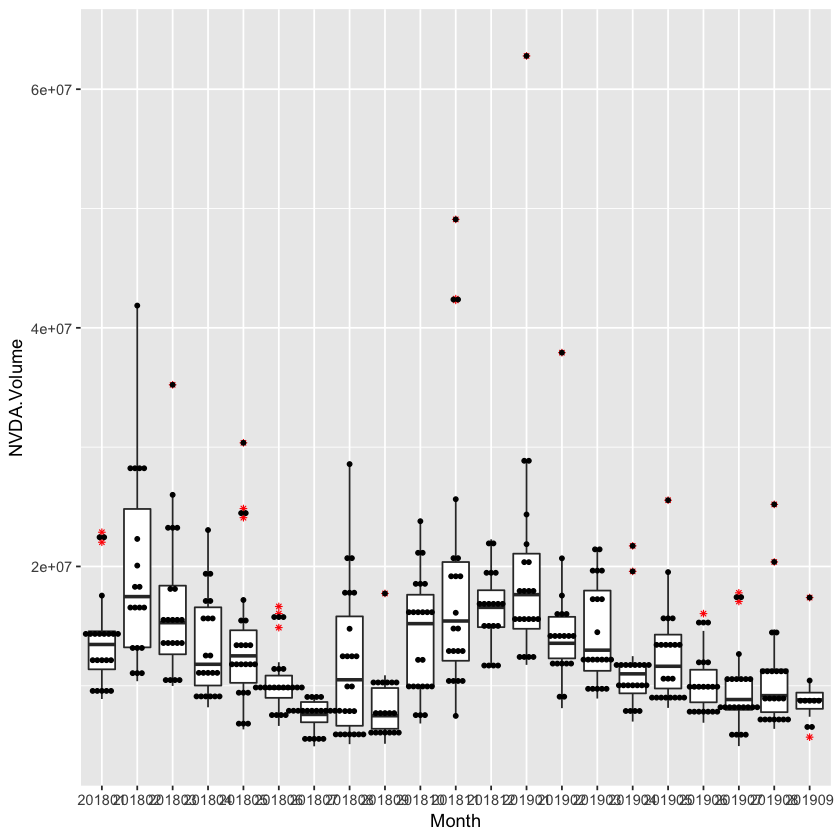

In [70]:
plot2018_19 + geom_dotplot(binaxis='y', stackdir='center', dotsize=0.2)

Warning message in bxp(list(stats = structure(c(8890400, 11377900, 13460200, 14566600, :
“some notches went outside hinges ('box'): maybe set notch=FALSE”

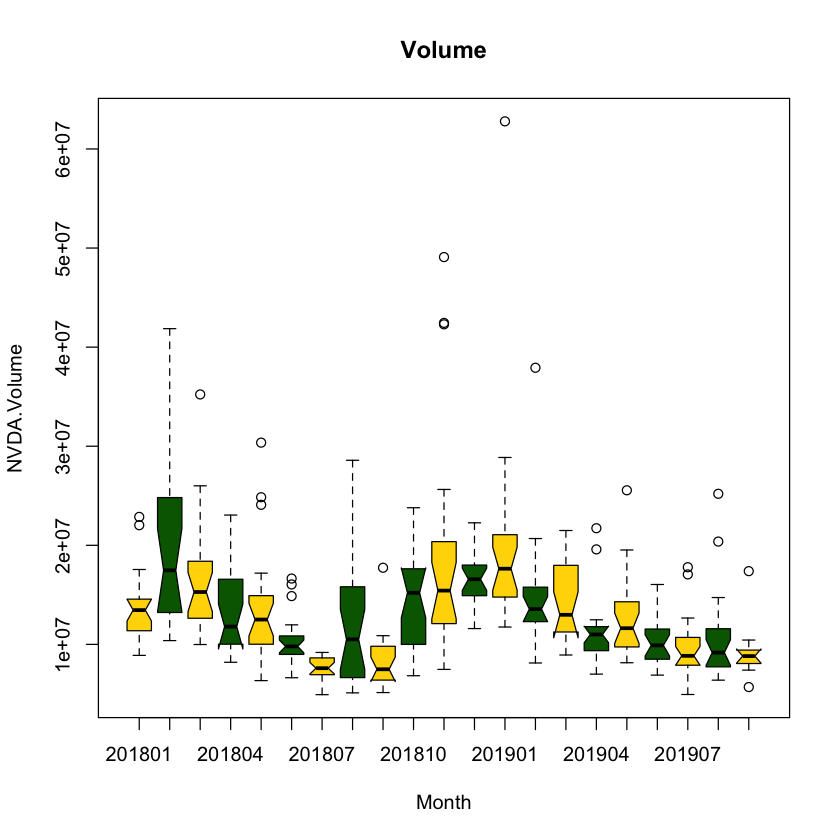

In [71]:
boxplot(NVDA.Volume~month, data=NVDA_2018_19, notch=TRUE, 
  col=(c("gold","darkgreen")),
  main="Volume", xlab="Month")

In [111]:
#barplot(NVDA_2018_19$NVDA.Volume)

## Trading Signal 
### Combined the use of MACD and RSI to get the signal of a overboughted / oversolded market
* The relative strength indicator (RSI) aims to signal whether a market is considered to be overbought or oversold in relation to recent price levels
* MACD=12-Period EMA − 26-Period EMA
* If the MACD signal crossed above the signal line we go long 
* If the MACD signal crossed below the signal line we do not buy
* The speed of crossovers is also taken as a signal of a market is overbought or oversold

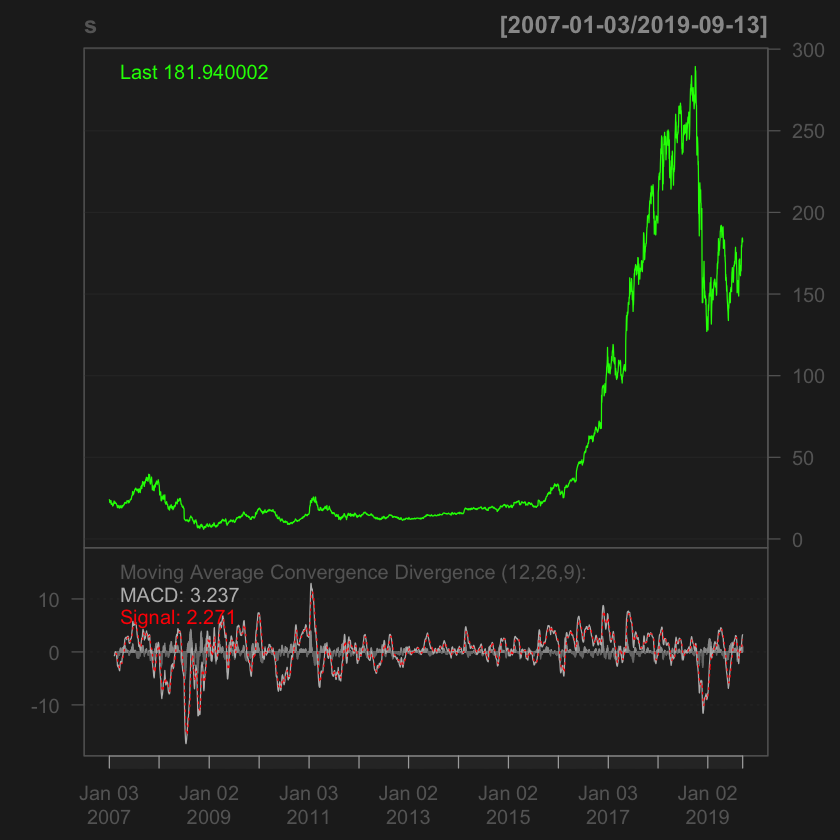

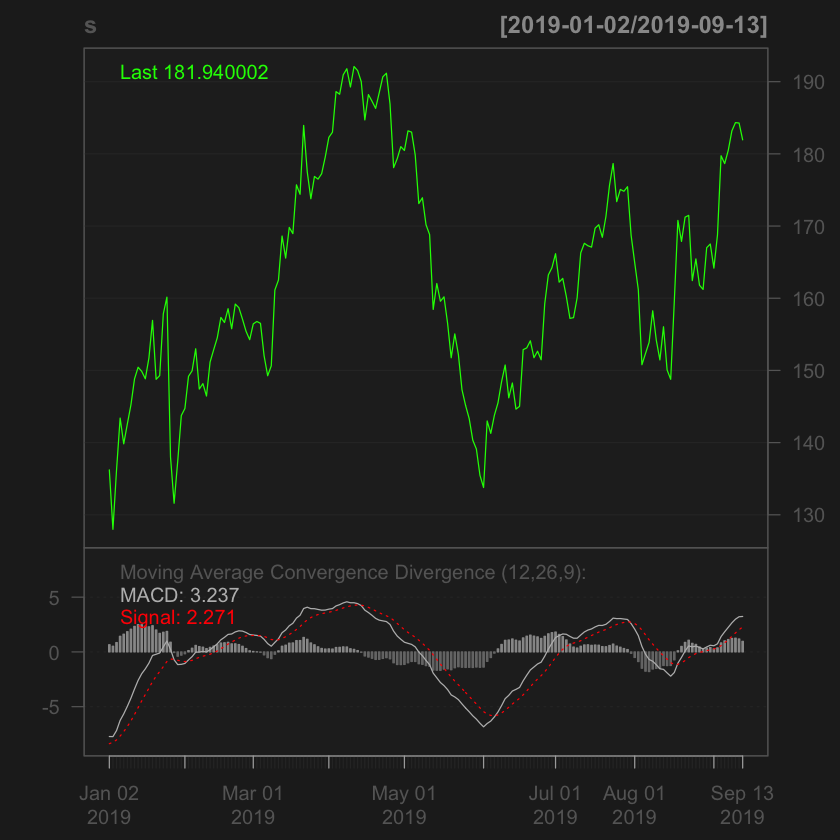

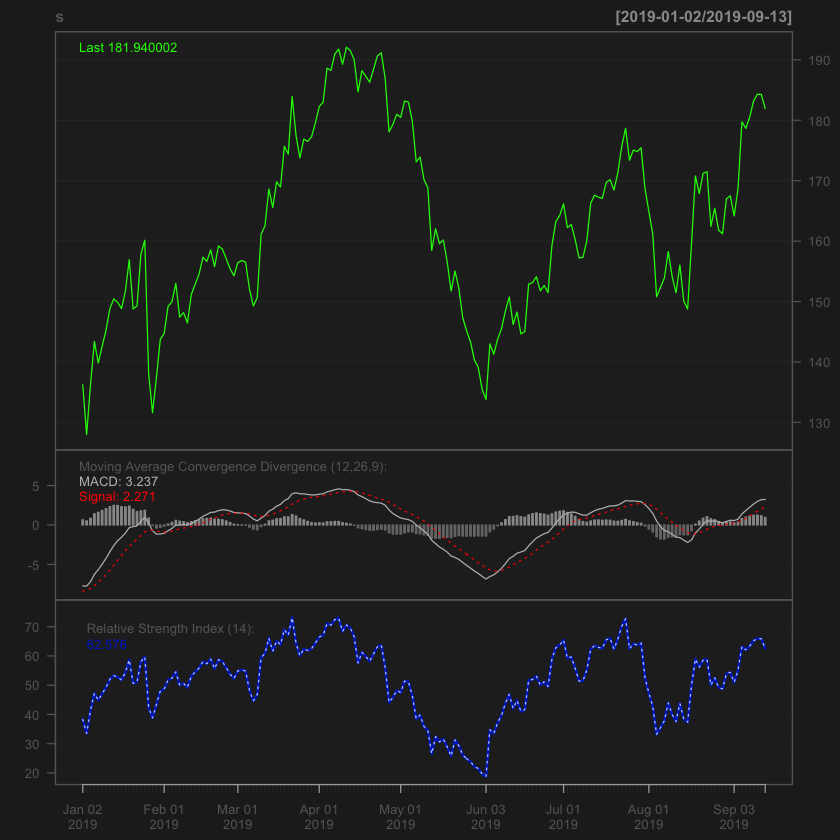

In [102]:
s = NVDA$NVDA.Close
macd = MACD(s, nFast=12, nSlow=26,nSig=9,maType=SMA, percent = FALSE)
chartSeries(s, TA="addMACD()")
zoomChart('2019')
addRSI()

## Conclusion

### In the EDA, I mainly analyzed the price and volume. The period I pick is 2018-2019. I found the price of NVDA dropped sharpely in late 2018. And After I zoom into year 2019, I found the price of NVDA dropped in a great degree in April. In my analysis, I compared the 20-day moving average, 60-day moving average and 200-day moving average. Also, I used CCI, MACD and RSI to find possible buy/sell signals.  